In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#importing data from gss csv
data=pd.read_csv("/Users/minpan/Desktop/Time Series/trends-gss.csv")

# Variable of Interest

I plan to analyze the trends in attitudes towards sexual relations between adults of the same sex over time, while exploring how age, gender, and educational levels are correlated with these attitudes.

The variables I have selected for this analysis are: "homosex," "year," "age," "sex," and "educ."

I chose the variable "homosex" to study the changing attitudes towards sexual relations between adults of the same sex over different periods. Here are the description and corresponding scales:
1: always wrong,
2: almost always wrong,
3: wrong only sometimes,
4: not wrong at all,
5: other

Additionally, I included the variables 'age' and 'sex' to examine differences in attitudes towards same-sex relations among different gender and age groups. Furthermore, I incorporated the variable "educ" to explore how differences in educational levels impact acceptance of homosexuality. 


In [3]:
#narrowing down to variables of interest
sub=data[['homosex','year','sex','age','educ']]

In [4]:
#removing na values
sub=sub.dropna()

In [5]:
#Checking the count after removing na values
sub['homosex'].value_counts()

1.0    21471
4.0     7254
3.0     2238
2.0     1572
5.0       81
Name: homosex, dtype: int64

In [6]:
sub.head()

,homosex,year,sex,age,educ
1613,1.0,1973,1,54.0,6.0
1614,1.0,1973,2,51.0,8.0
1615,1.0,1973,2,36.0,11.0
1616,1.0,1973,1,32.0,12.0
1617,1.0,1973,2,54.0,8.0


In [7]:
sub['n_homosex'] = sub['homosex']
sub['n_homosex']

1613     1.0
1614     1.0
1615     1.0
1616     1.0
1617     1.0
        ... 
57054    1.0
57055    4.0
57057    1.0
57058    1.0
57060    3.0
Name: n_homosex, Length: 32616, dtype: float64

In [8]:
#Checking value counts as percent
sub['n_homosex'].value_counts(normalize=True)

1.0    0.658297
4.0    0.222406
3.0    0.068617
2.0    0.048197
5.0    0.002483
Name: n_homosex, dtype: float64

###### Analysis: 
In 32,616 data points spanning across all the years, 65% of the respondents think that sexual relations between adults of the same sex are always wrong. Additionally, 22% of the respondents indicate that it is almost always wrong, while 4% of individuals believe that homosexuality is not wrong at all.

# Trend analysis on homosexuality opinions


#### Average number on attidues towards homesexuality in each year 

In [9]:
by_year = sub.groupby('year', as_index = False).agg({"n_homosex": "mean"})\
          .rename(columns = {"n_homosex": "mean_homosex"})
by_year

,year,mean_homosex
0,1973,1.635417
1,1974,1.743590
2,1976,1.695621
3,1977,1.655772
4,1980,1.621934
5,1982,1.585046
6,1984,1.630605
7,1985,1.591740
8,1987,1.515553
9,1988,1.546039


<Axes: xlabel='year', ylabel='mean_homosex'>

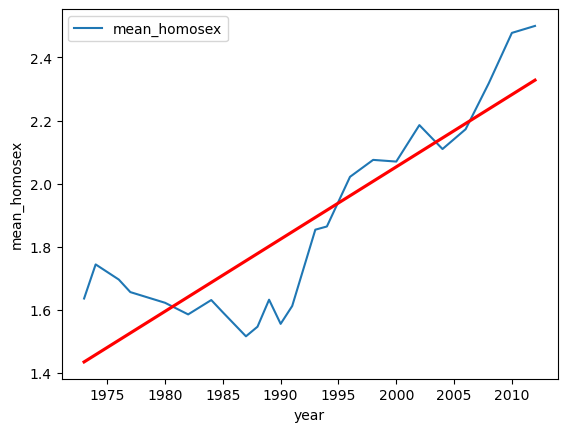

In [10]:
# plotting the trend
import seaborn as sns
by_year.plot(x='year', y= 'mean_homosex')
sns.regplot(x = 'year', y = 'mean_homosex', data = by_year,  scatter = False, ci= None, fit_reg = True, color = 'red')

###### Analysis: 

In the early years, from 1973 to 1989, the mean opinion score fluctuated from 1.515 (in 1987) to 1.743 (in 1974). There was a slight dip in acceptance during the late 1980s, reaching it's lowest point in 1987. This decline could be attributed to the social and political climate of that era.

During the late 1970s and early 1980s, misinformation about HIV and AIDS was widespread, often unfairly labeling the disease as a "gay disease." This stigma likely contributed to the prevailing negative attitudes towards homosexuality during this period. 

However, from 1993 onwards, there was a steeady rise in acceptance of same-sex sexual relation rises steadily. This upward trend suggests growing social acceptance of same-sex sexual relations over time. 

# Regression model on how people's views on homosexuality changed over time

In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# to fit regression model
lm_homosex=smf.ols('n_homosex~year', data=sub).fit()
lm_homosex.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              n_homosex   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     1381.
Date:                Sat, 14 Oct 2023   Prob (F-statistic):          4.56e-296
Time:                        23:53:44   Log-Likelihood:                -53471.
No. Observations:               32616   AIC:                         1.069e+05
Df Residuals:                   32614   BIC:                         1.070e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -42.8357      1.203    -35.611      0.000     -45.193     -40.478
year           0.0224      0.001     37.160      0.000       0.021       0.024
==============================================================================
Omnibus:                     6721.104   Durbin-Watson:                   1.739
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5191.699
Skew:                           0.880   Prob(JB):                         0.00
Kurtosis:                       2.148   Cond. No.                     3.47e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
#testing for heteroskedasticity
from statsmodels.compat import lzip
name=['BP', 'p-value', ' f-value', 'f p-value']

test=sm.stats.diagnostic.het_breuschpagan(lm_homosex.resid, lm_homosex.model.exog)
lzip(name,test)

[('BP', 789.1661956784819),
 ('p-value', 1.2233344123864096e-173),
 (' f-value', 808.6844724831918),
 ('f p-value', 9.794826773964241e-176)]

## Analysis: 

With the intercept of -42.8357 representing a baseline negative attitude towards same-sex relations, the attitude socre increased by 0.0224 points in each year. This indicates a postive trend in social acceptance of homosexuality over the years. 

Nevertheless, the R-squared value (0.041) suggests that approximately 4.1% of the variability in attitudes towards homosexaulity can be explained by 'year' in this regression model. This implies that there are other varibales beyond 'year' also influence the attitudes. 

The statistically significant 'f p-value'indicates the presence of 
heteroskedasticity, which raises concerns about the model's reliability. 

In [13]:
# Applying robust standard errors to improve the reliability of regression analysis. 
lm_rob=smf.ols('n_homosex~year', data=sub).fit(cov_type='HC1')
lm_rob.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              n_homosex   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     1276.
Date:                Sat, 14 Oct 2023   Prob (F-statistic):          4.07e-274
Time:                        23:53:44   Log-Likelihood:                -53471.
No. Observations:               32616   AIC:                         1.069e+05
Df Residuals:                   32614   BIC:                         1.070e+05
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -42.8357      1.250    -34.259      0.000     -45.286     -40.385
year           0.0224      0.001     35.718      0.000       0.021       0.024
==============================================================================
Omnibus:                     6721.104   Durbin-Watson:                   1.739
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5191.699
Skew:                           0.880   Prob(JB):                         0.00
Kurtosis:                       2.148   Cond. No.                     3.47e+05
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 3.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Analysis: 
The results with robust standard errors remained consistent with the previous reegression findings. The robust standard errors enhances the model's reliability, which shows a more accurate representation of the increasing societal acceptance of homosexuality over the years.

In [14]:
### Functional form :Using dummy variables for years
#refitting the model using year as a dummy variable
lm_dummy = smf.ols('n_homosex ~ C(year)', data = sub).fit()
lm_dummy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              n_homosex   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     80.42
Date:                Sat, 14 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:53:44   Log-Likelihood:                -53247.
No. Observations:               32616   AIC:                         1.065e+05
Df Residuals:                   32592   BIC:                         1.067e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.6354      0.033     50.105      0.000       1.571       1.699
C(year)[T.1974]     0.1082      0.046      2.329      0.020       0.017       0.199
C(year)[T.1976]     0.0602      0.046      1.299      0.194      -0.031       0.151
C(year)[T.1977]     0.0204      0.046      0.441      0.659      -0.070       0.111
C(year)[T.1980]    -0.0135      0.047     -0.289      0.772      -0.105       0.078
C(year)[T.1982]    -0.0504      0.044     -1.143      0.253      -0.137       0.036
C(year)[T.1984]    -0.0048      0.046     -0.104      0.917      -0.096       0.086
C(year)[T.1985]    -0.0437      0.046     -0.952      0.341      -0.134       0.046
C(year)[T.1987]    -0.1199      0.044     -2.715      0.007      -0.206      -0.033
C(year)[T.1988]    -0.0894      0.052     -1.718      0.086      -0.191       0.013
C(year)[T.1989]    -0.0037      0.051     -0.073      0.942      -0.105       0.097
C(year)[T.1990]    -0.0804      0.053     -1.512      0.130      -0.185       0.024
C(year)[T.1991]    -0.0237      0.052     -0.454      0.650      -0.126       0.079
C(year)[T.1993]     0.2183      0.051      4.288      0.000       0.119       0.318
C(year)[T.1994]     0.2285      0.043      5.268      0.000       0.143       0.313
C(year)[T.1996]     0.3860      0.044      8.789      0.000       0.300       0.472
C(year)[T.1998]     0.4397      0.044      9.970      0.000       0.353       0.526
C(year)[T.2000]     0.4344      0.044      9.780      0.000       0.347       0.521
C(year)[T.2002]     0.5500      0.053     10.375      0.000       0.446       0.654
C(year)[T.2004]     0.4742      0.053      8.905      0.000       0.370       0.579
C(year)[T.2006]     0.5369      0.043     12.412      0.000       0.452       0.622
C(year)[T.2008]     0.6826      0.048     14.289      0.000       0.589       0.776
C(year)[T.2010]     0.8425      0.048     17.480      0.000       0.748       0.937
C(year)[T.2012]     0.8646      0.048     17.994      0.000       0.770       0.959
==============================================================================
Omnibus:                     6156.959   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4944.250
Skew:                           0.860   Prob(JB):                         0.00
Kurtosis:                       2.177   Cond. No.                         24.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Analysis:
Utilizing dummy variables for each year offers a nuanced perspective on changing attitudes towards homosexuality. This table shows that in some years, such as 1993, 1994, and 1996, have significant positive coefficients, which suggests substantial increases in acceptance towards homosexaility during those periods.
Whereas,negative coefficients for certain years, such as 1987, suggest periods of lower acceptance. For example, the coefficient for 1987 (-0.1199) indicates a decrease in attitudes, corresponding to a 0.1199 point drop compared to the base year.

The overall R-squared value of 0.054 suggests that the variation in attitudes explained by the years is relatively limited.

# Unpooled regression comparison across time-periods.

In [15]:
# Create a dummy variable `late` for years after 1993 as 1 and otherwise 0
sub['late'] = ((sub.year > 1993)).astype(int)

In [16]:
lm_homosex_period = smf.ols('n_homosex ~ late', data = sub).fit()
lm_homosex_period.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              n_homosex   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     1415.
Date:                Sat, 14 Oct 2023   Prob (F-statistic):          4.44e-303
Time:                        23:53:44   Log-Likelihood:                -53455.
No. Observations:               32616   AIC:                         1.069e+05
Df Residuals:                   32614   BIC:                         1.069e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6310      0.009    176.383      0.000       1.613       1.649
late           0.5224      0.014     37.610      0.000       0.495       0.550
==============================================================================
Omnibus:                     6978.272   Durbin-Watson:                   1.741
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5136.107
Skew:                           0.869   Prob(JB):                         0.00
Kurtosis:                       2.130   Cond. No.                         2.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='year', ylabel='mean_homosex'>

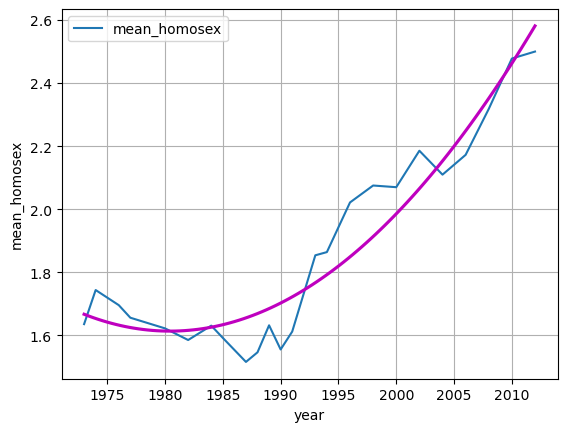

In [17]:
# plot the trend using matplotlib
by_year.plot(x = 'year', y = 'mean_homosex', grid = True)

# superimpose a quadratic fitted line using the seaborn package, specifying 'order = 2' for quadratic fit
sns.regplot(x = 'year', y = 'mean_homosex', data = by_year, order = 2,
            scatter = False, ci = None, fit_reg = True, color = 'm')

###### Analysis:
The result indicates a significant increase of 0.5224 points in public acceptance of homosexuality after 1993 compared to the period before. 

The high t-statistic (37.610) and low p-value (4.44e-303) highlight the statistical significance of this change.

Next, there is only approximately 4% of the variation in attitudes is explained by this model. This percentage is lower compared to the model utilizing 'year' as a dummy variable. 

These results suggest that 1993 serves as a turning point in public opinion, with a notable increase in acceptance towards homosexuality after this year. 

# Interaction of gender with "late period"

In [18]:
# map the indicators variables for sex back to 1 and 2
sub['sex'].replace({'Male': 1, 'Female': 2}, inplace = True)

lm_homosex_period_int = smf.ols('n_homosex ~ late*C(sex)', data = sub).fit()
lm_homosex_period_int.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              n_homosex   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     488.7
Date:                Sat, 14 Oct 2023   Prob (F-statistic):          1.23e-310
Time:                        23:53:44   Log-Likelihood:                -53430.
No. Observations:               32616   AIC:                         1.069e+05
Df Residuals:                   32612   BIC:                         1.069e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.6217      0.014    116.574      0.000       1.594       1.649
C(sex)[T.2]          0.0167      0.019      0.899      0.369      -0.020       0.053
late                 0.4522      0.021     21.787      0.000       0.412       0.493
late:C(sex)[T.2]     0.1283      0.028      4.596      0.000       0.074       0.183
==============================================================================
Omnibus:                     6854.674   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5106.876
Skew:                           0.868   Prob(JB):                         0.00
Kurtosis:                       2.137   Cond. No.                         6.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Analysis:

Before 1993, the average attitude score for how males view homosexuality is around 1.62 score. Females had attitudes 0.0167 points higher than males before 1993. However, this difference is not statistically significant because p-value = 0.369, indicating that the gender gap before 1993 was not significant.

After 1993, men's acceptance towards homosexuality increase by 0.4522 ponits each year. On average, females' attitudes increased by an additional 0.1283 points compared to males after 1993. This difference is statistically significant because p < 0.001, which indicates that there is a gender-specific shift in attitudes on homosexuality after 1993.

As the adjusted R-sq is close to the model without the interaction with gender, the effect is not substantial enough to improve the overall predictive ability of the model when considering gender. 

# Understanding the trend of education first for further examining how education is a means of explaining the trend of public opinion on homosexuality

In [19]:
sub['educ'].value_counts()

12.0    10065
16.0     3873
14.0     3435
13.0     2718
11.0     1973
10.0     1582
8.0      1545
15.0     1420
9.0      1141
18.0     1110
17.0      981
20.0      653
7.0       515
6.0       448
19.0      436
5.0       223
4.0       188
3.0       140
2.0        76
0.0        75
1.0        19
Name: educ, dtype: int64

In [20]:
sub['n_educ'] = sub['educ']
sub['n_educ']

1613      6.0
1614      8.0
1615     11.0
1616     12.0
1617      8.0
         ... 
57054     9.0
57055    11.0
57057    13.0
57058    13.0
57060    12.0
Name: n_educ, Length: 32616, dtype: float64

In [21]:
sub['n_educ'].value_counts(normalize=True)

12.0    0.308591
16.0    0.118745
14.0    0.105316
13.0    0.083333
11.0    0.060492
10.0    0.048504
8.0     0.047369
15.0    0.043537
9.0     0.034983
18.0    0.034032
17.0    0.030077
20.0    0.020021
7.0     0.015790
6.0     0.013736
19.0    0.013368
5.0     0.006837
4.0     0.005764
3.0     0.004292
2.0     0.002330
0.0     0.002299
1.0     0.000583
Name: n_educ, dtype: float64

In [22]:
#Understanding the trend of education first
by_educ = sub.groupby('year', as_index = False).agg({"n_educ": "mean"})\
          .rename(columns = {"n_educ": "mean_educ"})
by_educ

,year,mean_educ
0,1973,11.607639
1,1974,11.782764
2,1976,11.719633
3,1977,11.666203
4,1980,11.987013
5,1982,11.885845
6,1984,12.345907
7,1985,12.419770
8,1987,12.310484
9,1988,12.478587


<Axes: xlabel='year', ylabel='mean_educ'>

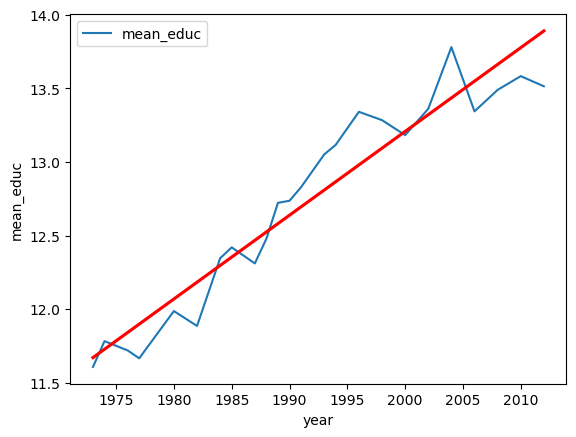

In [23]:
# Graphing out the trend of education over time
import seaborn as sns
by_educ.plot(x='year', y= 'mean_educ')
sns.regplot(x = 'year', y = 'mean_educ', data = by_educ,  scatter = False, ci= None, fit_reg = True, color = 'red')

In [24]:
#Developing a regression model to see how education has changed over time
import statsmodels.api as sm
import statsmodels.formula.api as smf
# to fit regression model
lm_educ=smf.ols('n_educ~year', data=sub).fit()
lm_educ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 n_educ   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     1434.
Date:                Sat, 14 Oct 2023   Prob (F-statistic):          3.33e-307
Time:                        23:53:45   Log-Likelihood:                -83317.
No. Observations:               32616   AIC:                         1.666e+05
Df Residuals:                   32614   BIC:                         1.667e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -101.0432      3.003    -33.642      0.000    -106.930     -95.156
year           0.0571      0.002     37.873      0.000       0.054       0.060
==============================================================================
Omnibus:                     1260.176   Durbin-Watson:                   1.629
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2129.134
Skew:                          -0.335   Prob(JB):                         0.00
Kurtosis:                       4.058   Cond. No.                     3.47e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###### Analysis:
The regression results reveal a gradual increase in educational attainment for respondents, rising by 0.0571 points over time. This trend indicates an inclination for further studies across the years. The model's low p-value emphasizes the statistical significance of this trend, indicating its reliability. Additionally, the R-squared value shows that 4.2% of the variation in educational attainment can be explained by the observed factors. 

# How educational level impact peoples' views on homosexuality

In [25]:
#Regression model on peoples' views on homosexuality and education level 
import statsmodels.api as sm
import statsmodels.formula.api as smf
# to fit regression model
lm_homosex2=smf.ols('n_homosex~educ', data=sub).fit()
lm_homosex2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              n_homosex   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     2932.
Date:                Sat, 14 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:53:45   Log-Likelihood:                -52744.
No. Observations:               32616   AIC:                         1.055e+05
Df Residuals:                   32614   BIC:                         1.055e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4025      0.028     14.478      0.000       0.348       0.457
educ           0.1149      0.002     54.146      0.000       0.111       0.119
==============================================================================
Omnibus:                     5488.409   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4670.388
Skew:                           0.841   Prob(JB):                         0.00
Kurtosis:                       2.218   Cond. No.                         54.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='educ', ylabel='n_homosex'>

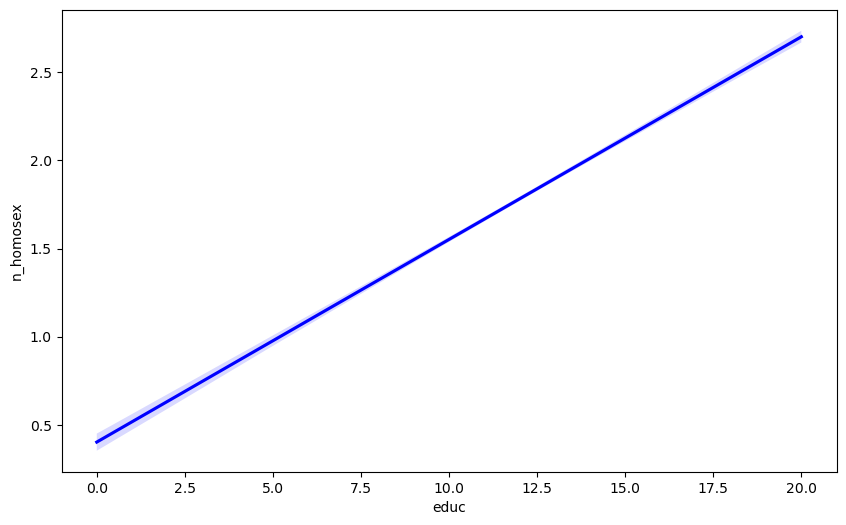

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with regression line
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with regression line using regplot
plt.figure(figsize=(10, 6))
sns.regplot(x='educ', y='n_homosex', data=sub, scatter=False, color='b', label='Regression line')

###### Analysis: 
These results demonstrate a positive relationship between individuals' views on homosexuality and their level of education. For each additional year of education, respondents' attitudes towards homosexuality increase by 0.1149 points. The model's R-squared value implies that 8.2% of the variation in attitudes towards homosexuality can be explained by the education variable. The p-values for both the intercept and the 'educ' variable (both < 0.001) highlights the robustness of this relationship.

In summary, these findings indicate that higher education is associated with more favorable attitudes towards homosexuality, emphasizing the pivotal role education plays in shaping positiive perspectives on homosexuality. 

In [27]:
#Testing heteroskedasticity
from statsmodels.compat import lzip
name=['BP', 'p-value', ' f-value', 'f p-value']

test=sm.stats.diagnostic.het_breuschpagan(lm_homosex2.resid, lm_homosex2.model.exog)
lzip(name,test)

[('BP', 1313.766022328794),
 ('p-value', 1.1526145525084068e-287),
 (' f-value', 1368.8213142485438),
 ('f p-value', 1.4960159939931284e-293)]

There is heteroskedasticity in the regression model (BP = 1313.77, p < 1.15e-287).

# Peoples' view on homosexuality and age

In [28]:
#Regression model on peoples' views on homosexuality and age
import statsmodels.api as sm
import statsmodels.formula.api as smf
# to fit regression model
lm_homosex3=smf.ols('n_homosex~age', data=sub).fit()
lm_homosex3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              n_homosex   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sat, 14 Oct 2023   Prob (F-statistic):          8.80e-244
Time:                        23:53:47   Log-Likelihood:                -53592.
No. Observations:               32616   AIC:                         1.072e+05
Df Residuals:                   32614   BIC:                         1.072e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4684      0.019    127.890      0.000       2.431       2.506
age           -0.0133      0.000    -33.631      0.000      -0.014      -0.013
==============================================================================
Omnibus:                     7657.354   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5352.935
Skew:                           0.885   Prob(JB):                         0.00
Kurtosis:                       2.101   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Analysis:
The results demonstrate a negative association between age and acceptance of homosexuality, indicating a decrease of 0.0133 points in attitudes towards homosexuality for each additional year of age. The R-squared value suggests that age explains approximately 3.4% of the variance in attitudes. Additionally, the intercept of 2.4684 represents the baseline level of acceptance among younger respondents. The F-statistic of 1131 (p < 8.80e-244) Highlights the overall significance of the regression model. 

These findings indicate that younger individuals tend to be more accepting of homosexuality compared to older generations. 

In [ ]:
#Testing heteroskedasticity
from statsmodels.compat import lzip
name=['BP', 'p-value', ' f-value', 'f p-value']

test=sm.stats.diagnostic.het_breuschpagan(lm_homosex3.resid, lm_homosex3.model.exog)
lzip(name,test)

The results indicate the presence of heteroskedasticity in the regression model, with a statistically significant p-value of 9.1045e-229.

In [31]:
# #Understanding average number of homosex by age
by_age = sub.groupby('age', as_index = False).agg({"n_homosex": "mean"})\
          .rename(columns = {"n_homosex": "mean_homosex"})
by_age

,age,mean_homosex
0,18.0,2.190476
1,19.0,1.982796
2,20.0,2.051690
3,21.0,2.092657
4,22.0,2.080214
...,...,...
67,85.0,1.224490
68,86.0,1.392857
69,87.0,1.352941
70,88.0,1.178571


This shows a negative correlation between age and views on homosexuality 

In [32]:
#Understanding average number of homosex by males vs females
by_sex = sub.groupby('sex', as_index = False).agg({"n_homosex": "mean"})\
          .rename(columns = {"n_homosex": "mean_homosex"})
by_sex

,sex,mean_homosex
0,1,1.824820
1,2,1.892978


The attitude score for males and female is very close 